In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

In [82]:
df = pd.read_csv('C:/Users/tomas.hehir/Source/Repos/Footy/data/PL/1718-2324PLTable.csv')

In [83]:
df = df.drop('Unnamed: 0', axis=1)

In [84]:
y = df.Rk #dependent var (what we are trying to predict)
x = df.Pts.values.reshape(-1,1) #we need to reshape the df

In [85]:
print(x.shape)
print(y.shape)

(140, 1)
(140,)


In [86]:
model = LinearRegression().fit(x,y)

In [87]:
r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_

print(r_sq) #higher number the better

0.9129972531469996


In [88]:
y_pred = intercept + slope*x   #y = bo + b1x

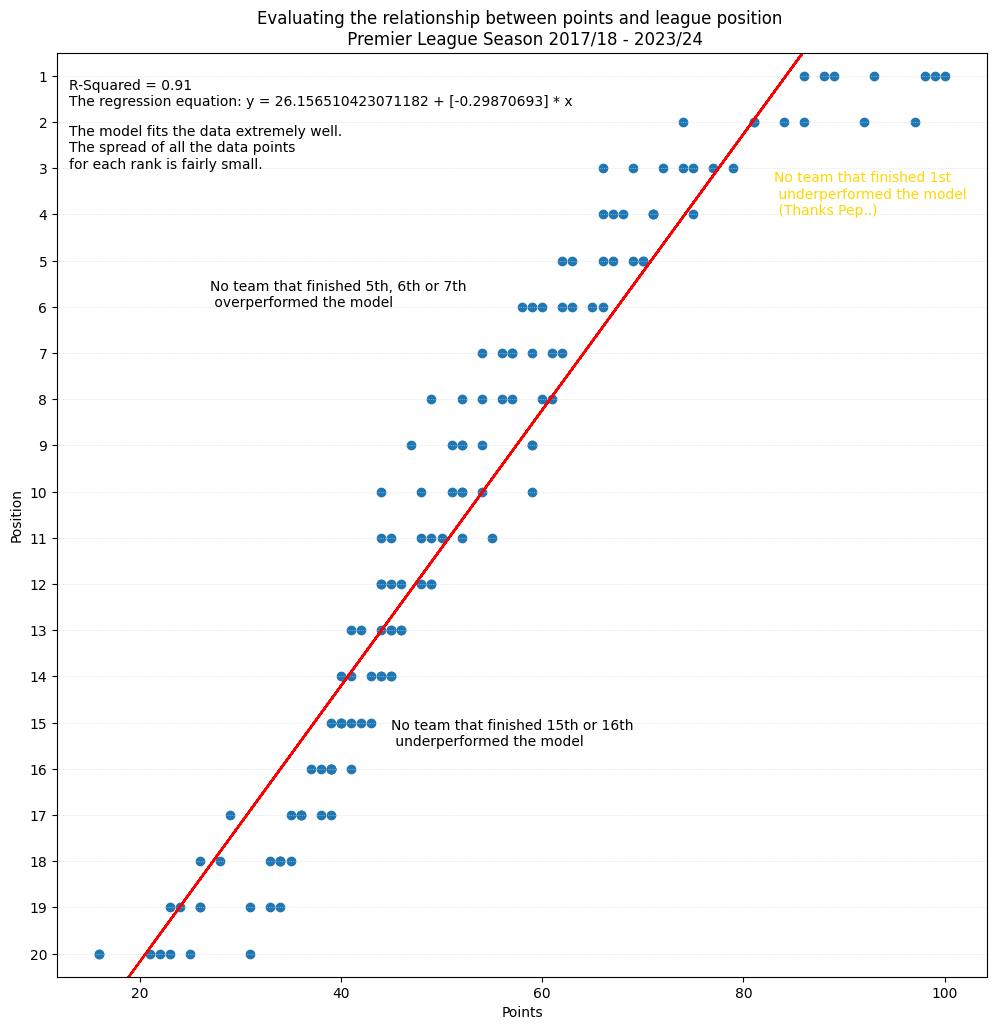

In [89]:
fig, ax  = plt.subplots(figsize=(12,12))
ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

plt.scatter(x, y)
plt.plot(x,y_pred, c='red')
plt.ylim(0.5, 20.5)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.gca().invert_yaxis()

plt.xlabel('Points')
plt.ylabel('Position')

plt.title('Evaluating the relationship between points and league position \n Premier League Season 2017/18 - 2023/24')

#analysis
ax.annotate(xy=(13,1.65),text=f'R-Squared = {round(r_sq,2)}\nThe regression equation: y = {intercept} + {slope} * x ')
ax.annotate(xy=(83,4),text='No team that finished 1st \n underperformed the model \n (Thanks Pep..)', c='gold')
ax.annotate(xy=(27,6),text='No team that finished 5th, 6th or 7th \n overperformed the model')
ax.annotate(xy=(45,15.5),text='No team that finished 15th or 16th \n underperformed the model')
ax.annotate(xy=(13,3),text=f'The model fits the data extremely well.\nThe spread of all the data points\nfor each rank is fairly small.')

plt.savefig('C:/Users/tomas.hehir/Source/Repos/Footy/outputs/PL/premline1824.png',dpi=300,bbox_inches = 'tight')


In [90]:
df2 = pd.read_csv('C:/Users/tomas.hehir/Source/Repos/Footy/data/PL/0910-2324PLTable.csv')

In [91]:
df2 = df2[df2['Season'] < 2018]
df2 = df2.drop('Unnamed: 0', axis=1)
df2 = df2.reset_index()
df2 = df2.drop('index', axis=1)
df2

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Season
0,1,Chelsea,38,30,3,5,85,33,52,93,2.45,NaN,NaN,NaN,NaN,41508,Diego Costa - 20,2017
1,2,Tottenham,38,26,8,4,86,26,60,86,2.26,NaN,NaN,NaN,NaN,31639,Harry Kane - 29,2017
2,3,Manchester City,38,23,9,6,80,39,41,78,2.05,NaN,NaN,NaN,NaN,54019,Sergio Agüero - 20,2017
3,4,Liverpool,38,22,10,6,78,42,36,76,2.00,NaN,NaN,NaN,NaN,53016,"Philippe Coutinho, Sadio Mané - 13",2017
4,5,Arsenal,38,23,6,9,77,44,33,75,1.97,NaN,NaN,NaN,NaN,59957,Alexis Sánchez - 24,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,16,Wigan Athletic,38,9,9,20,37,79,-42,36,0.95,NaN,NaN,NaN,NaN,18006,Hugo Rodallega - 10,2010
156,17,West Ham,38,8,11,19,47,66,-19,35,0.92,NaN,NaN,NaN,NaN,33683,Carlton Cole - 10,2010
157,18,Burnley,38,8,6,24,42,82,-40,30,0.79,NaN,NaN,NaN,NaN,20654,Steven Fletcher - 8,2010
158,19,Hull City,38,6,12,20,34,75,-41,30,0.79,NaN,NaN,NaN,NaN,24390,Stephen Hunt - 6,2010


In [92]:
y2 = df2.Rk #dependent var (what we are trying to predict)
x2 = df2.Pts.values.reshape(-1,1) #we need to reshape the df

In [93]:
print(x2.shape)
print(y2.shape)

(160, 1)
(160,)


In [94]:
model2 = LinearRegression().fit(x2,y2)

In [95]:
slope2 =model2.coef_
intercept2= model2.intercept_
r_sq2= model2.score(x2,y2)
r_sq2

0.910853487757416

In [96]:
y_pred2 = intercept2 + slope2*x2   #y = bo + b1x

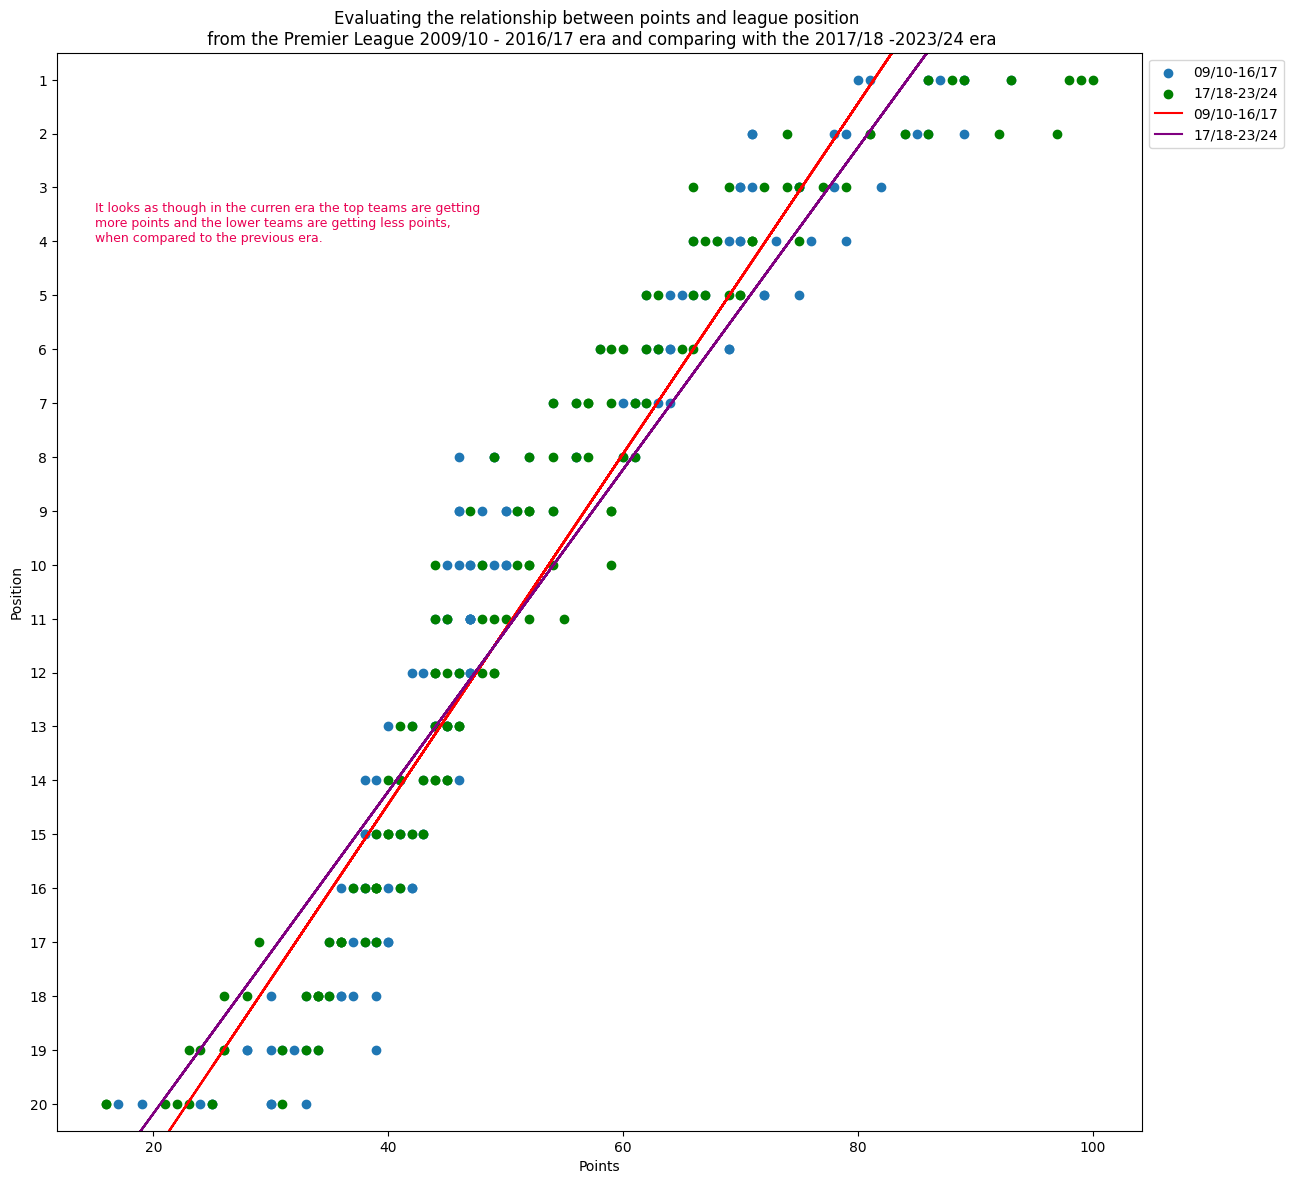

In [97]:
fig2, ax2  = plt.subplots(figsize=(14,14))
ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

plt.scatter(x2, y2)
plt.scatter(x, y, c='green')
plt.plot(x2,y_pred2, c='red')
plt.plot(x,y_pred, c='purple')

plt.legend(["09/10-16/17" , "17/18-23/24", '09/10-16/17', "17/18-23/24"], bbox_to_anchor = (1 , 1))

plt.ylim(0.5, 20.5)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.gca().invert_yaxis()

plt.xlabel('Points')
plt.ylabel('Position')

plt.title('Evaluating the relationship between points and league position \n from the Premier League 2009/10 - 2016/17 era and comparing with the 2017/18 -2023/24 era')

ax2.annotate(xy=(15,4),text='It looks as though in the curren era the top teams are getting\nmore points and the lower teams are getting less points,\nwhen compared to the previous era.', c='#e90052', size=9)

plt.savefig('C:/Users/tomas.hehir/Source/Repos/Footy/outputs/PL/premline09-17vs18-24.png',dpi=400,bbox_inches = 'tight')